In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('../data/benin_cleaned_data.csv')

# Convert the Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Display the first few rows to verify
df.head()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 06:54:00,16.7,0.0,16.5,16.1,16.3,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.2,23.7,NaN
2021-08-09 06:55:00,18.2,0.1,18.0,17.4,17.6,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.8,NaN
2021-08-09 06:56:00,19.7,0.3,19.5,18.7,18.9,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.9,NaN
2021-08-09 06:57:00,21.1,0.6,20.9,19.9,20.1,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.4,23.9,NaN
2021-08-09 06:58:00,22.5,1.1,22.2,21.1,21.3,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0,NaN


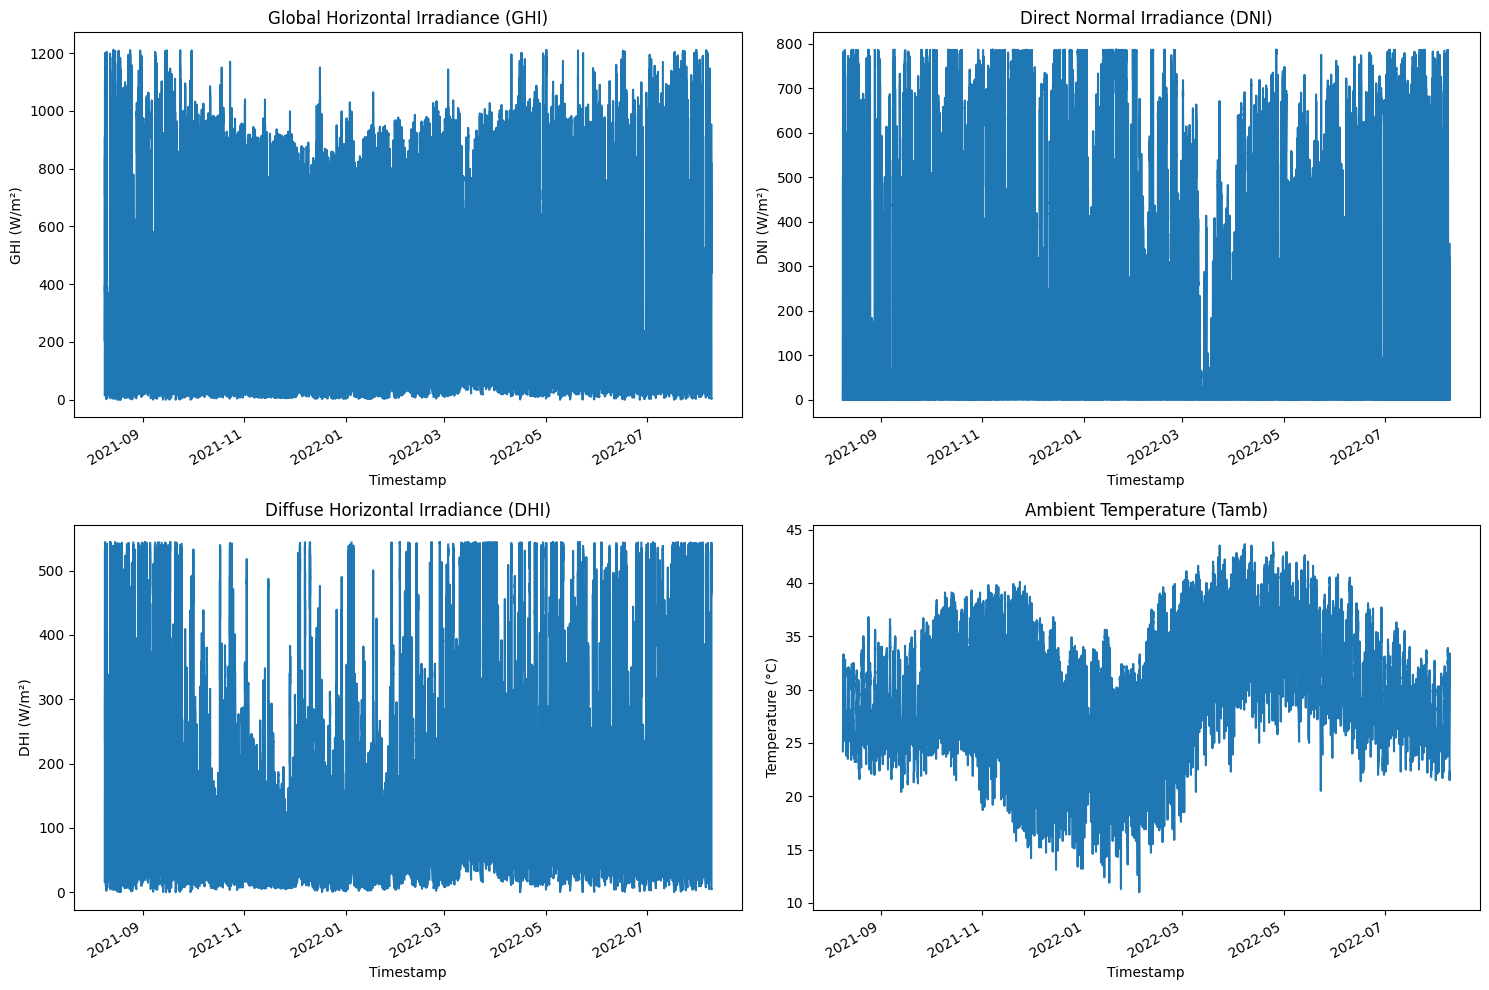

In [8]:
# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['GHI'].plot(title='Global Horizontal Irradiance (GHI)')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')

plt.subplot(2, 2, 2)
df['DNI'].plot(title='Direct Normal Irradiance (DNI)')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')

plt.subplot(2, 2, 3)
df['DHI'].plot(title='Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')

plt.subplot(2, 2, 4)
df['Tamb'].plot(title='Ambient Temperature (Tamb)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_22929/2882144599.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


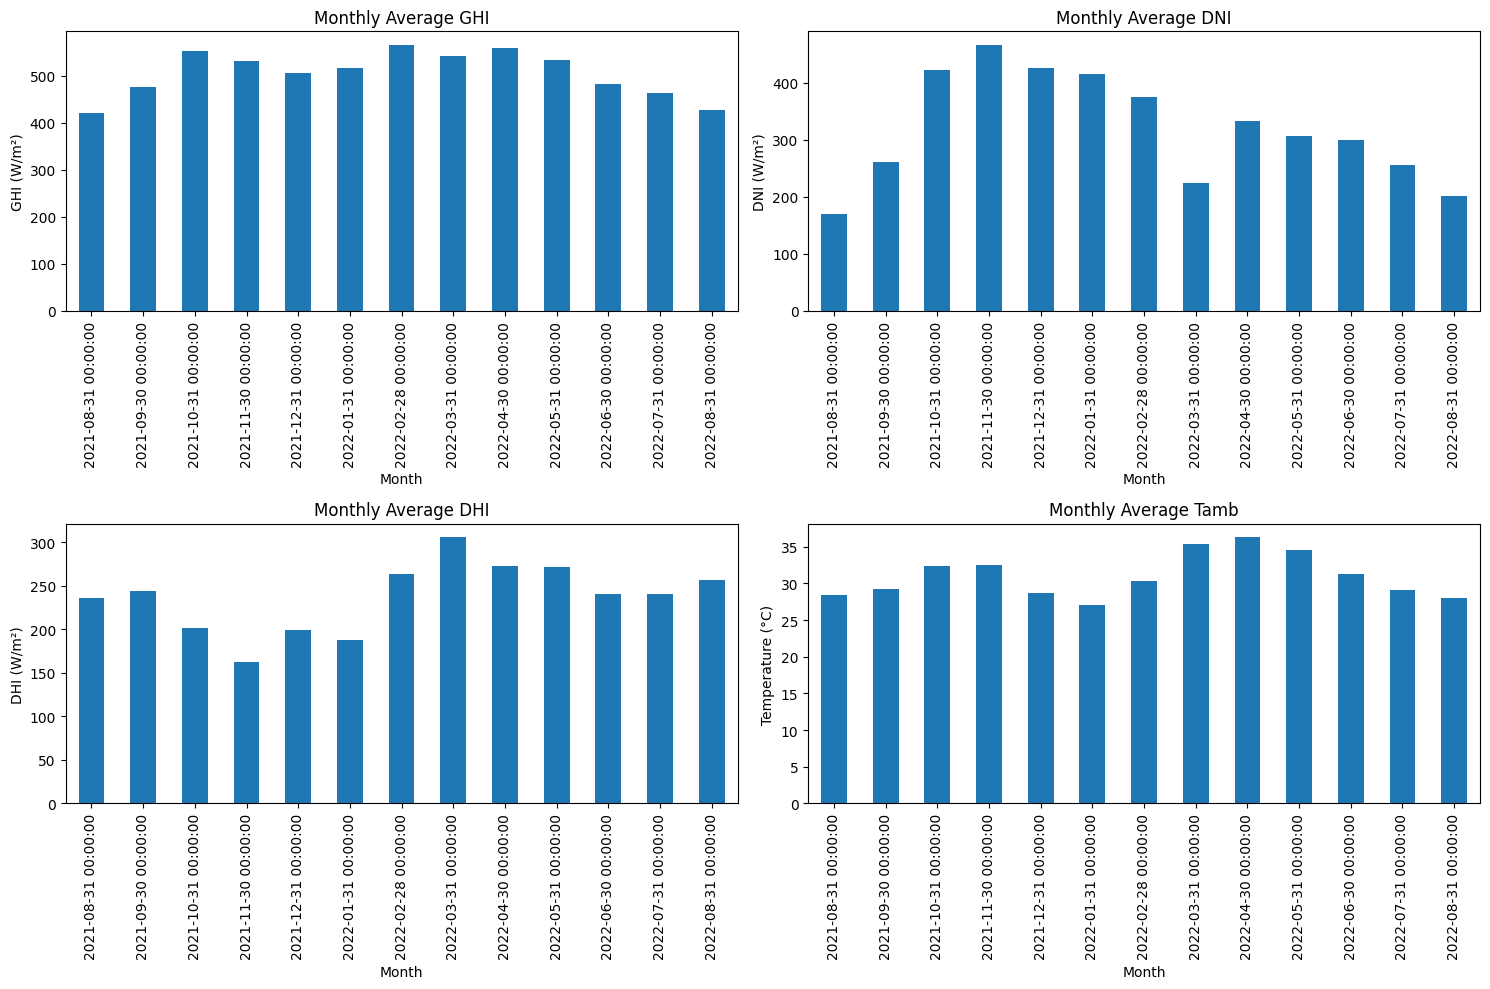

In [10]:
# Resample the data to monthly frequency and calculate mean
monthly_data = df.resample('M').mean()

# Plot monthly averages
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
monthly_data['GHI'].plot(kind='bar', title='Monthly Average GHI')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')

plt.subplot(2, 2, 2)
monthly_data['DNI'].plot(kind='bar', title='Monthly Average DNI')
plt.xlabel('Month')
plt.ylabel('DNI (W/m²)')

plt.subplot(2, 2, 3)
monthly_data['DHI'].plot(kind='bar', title='Monthly Average DHI')
plt.xlabel('Month')
plt.ylabel('DHI (W/m²)')

plt.subplot(2, 2, 4)
monthly_data['Tamb'].plot(kind='bar', title='Monthly Average Tamb')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()


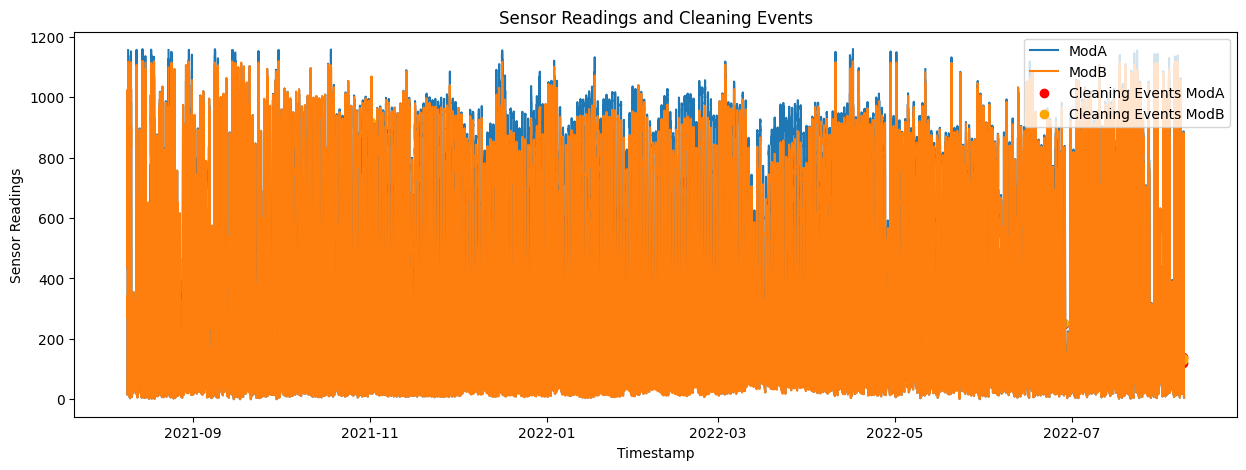

In [11]:
# Plot sensor readings (ModA, ModB) with Cleaning events
plt.figure(figsize=(15, 5))

plt.plot(df.index, df['ModA'], label='ModA')
plt.plot(df.index, df['ModB'], label='ModB')
plt.scatter(df[df['Cleaning'] > 0].index, df[df['Cleaning'] > 0]['ModA'], color='red', label='Cleaning Events ModA')
plt.scatter(df[df['Cleaning'] > 0].index, df[df['Cleaning'] > 0]['ModB'], color='orange', label='Cleaning Events ModB')
plt.title('Sensor Readings and Cleaning Events')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings')
plt.legend()
plt.show()


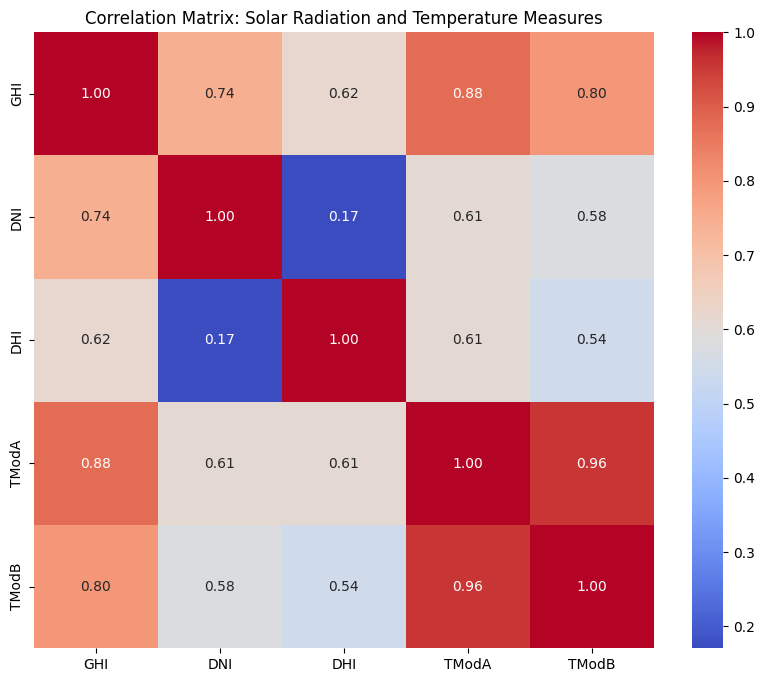

In [13]:
import seaborn as sns
# Select relevant columns for correlation analysis
solar_temp_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate the correlation matrix
corr_matrix = df[solar_temp_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Solar Radiation and Temperature Measures')
plt.show()


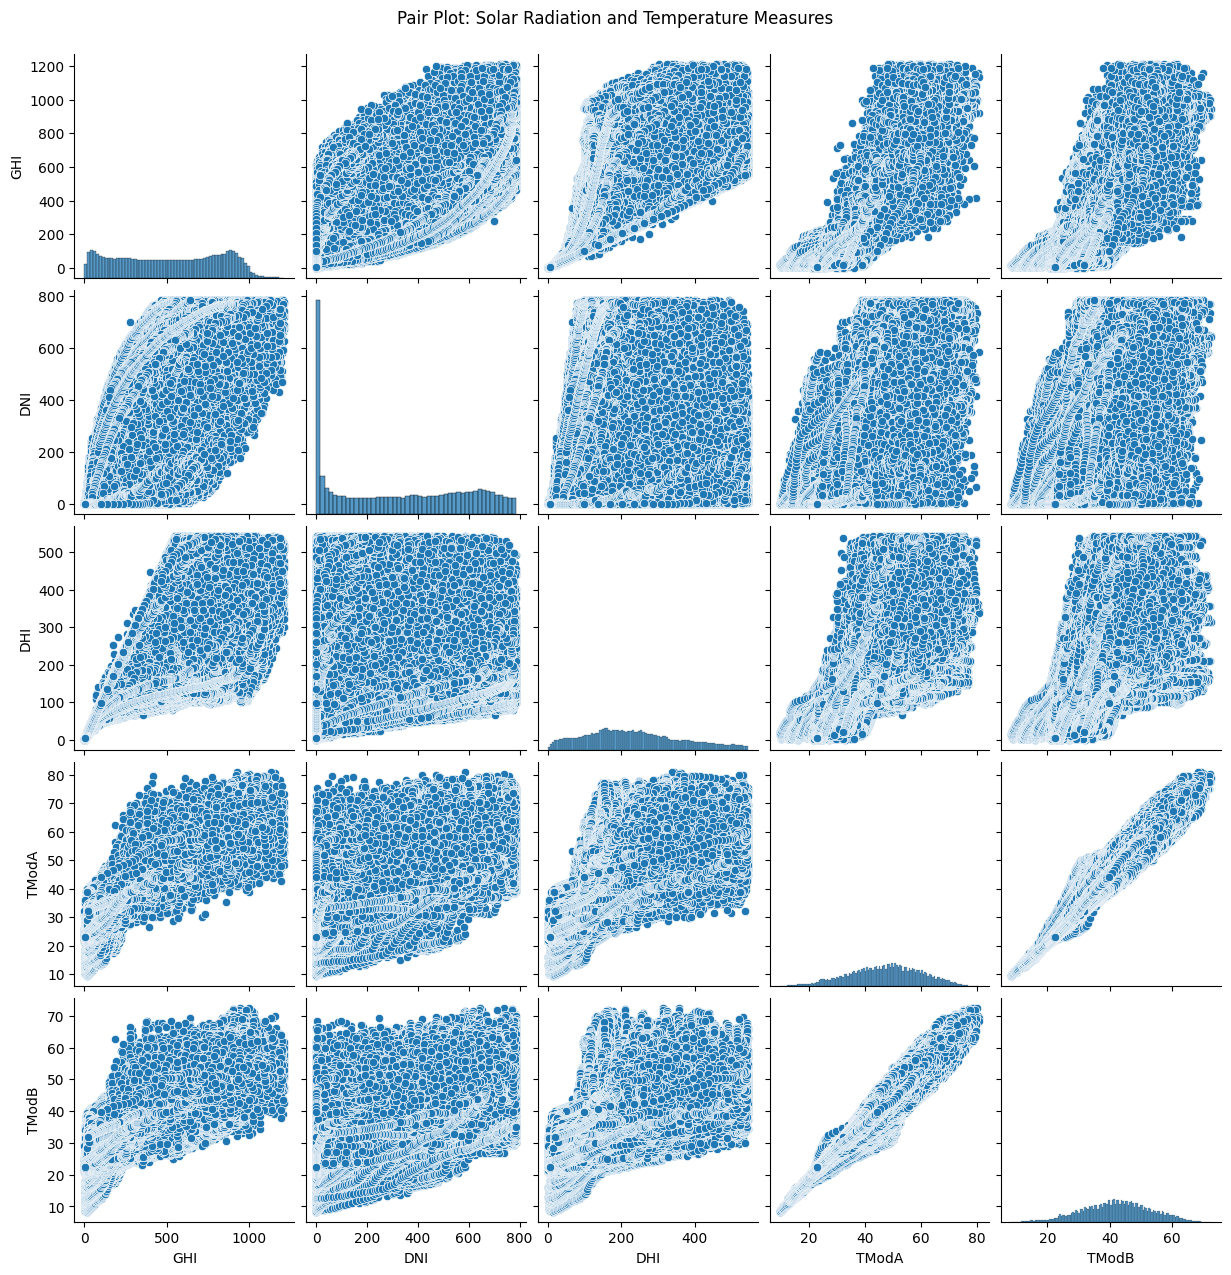

In [14]:
# Pair plot for solar radiation components and temperature measures
sns.pairplot(df[solar_temp_cols])
plt.suptitle('Pair Plot: Solar Radiation and Temperature Measures', y=1.02)
plt.show()


In [ ]:
# Select relevant columns for scatter matrix analysis
wind_solar_cols = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']

# Plot scatter matrix
sns.pairplot(df[wind_solar_cols])
plt.suptitle('Scatter Matrix: Wind Conditions and Solar Irradiance', y=1.02)
plt.show()
